In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

import pyro
import pyro.distributions as dist

from rethinking import MAP

#### Code 2.1

In [2]:
ways = torch.tensor([0., 3, 8, 9, 0])
ways / ways.sum()

tensor([0.0000, 0.1500, 0.4000, 0.4500, 0.0000])

#### Code 2.2

In [3]:
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

#### Code 2.3

In [4]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=20)

# define prior
prior = torch.tensor(1.).repeat(20)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9, probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior)

#### Code 2.4

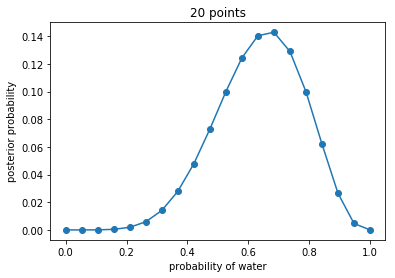

In [5]:
plt.plot(p_grid.numpy(), posterior.numpy(), marker="o")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("20 points");

#### Code 2.5

In [6]:
prior = torch.where(p_grid < 0.5, torch.tensor(0.), torch.tensor(1.))
prior = (-5 * abs(p_grid - 0.5)).exp()

#### Code 2.6

In [7]:
def globe_model(w):
    p = pyro.sample("p", dist.Uniform(0, 1))  # unifrom prior
    pyro.sample("w", dist.Binomial(9, p), obs=w)  # binomial likelihood

globe_qa = MAP(globe_model, w=torch.tensor(6.))
globe_qa.fit()

# display summary of quadratic approximation
globe_qa.precis()

,Mean,StdDev,5.5%,94.5%
p,0.67,0.16,0.42,0.92


#### Code 2.7

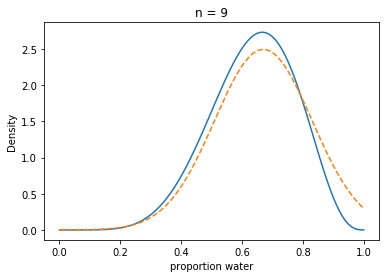

In [8]:
# analytical calculation
w = 6
n = 9
x = torch.linspace(0, 1, 101)
plt.plot(x.numpy(), dist.Beta(w + 1, n - w + 1).log_prob(x).exp().numpy())
# quadratic approximation
plt.plot(x.numpy(), dist.Normal(0.67, 0.16).log_prob(x).exp().numpy(), linestyle="--")
plt.xlabel("proportion water")
plt.ylabel("Density")
plt.title("n = 9");